In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# AI-Based Network Traffic Anomaly Detection Using Machine Learning Techniques
# Updated Version - Train on Training Set, Test on Test Set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("Project Title: AI-BASED NETWORK TRAFFIC ANOMALY DETECTION")
print("=" * 60)

Project Title: AI-BASED NETWORK TRAFFIC ANOMALY DETECTION


In [3]:
# STEP 1: PROBLEM DEFINITION
print("\n STEP 1: PROBLEM DEFINITION")
print("-" * 40)
print("""
OBJECTIVE: Develop an AI-based system to detect network traffic anomalies
DATASET: UNSW-NB15 Network Security Dataset
APPROACH: Multi-algorithm machine learning classification
TARGET: Binary classification (Normal=0, Attack=1)
METRICS: Accuracy, Precision, Recall, F1-Score, AUC-ROC
TRAINING: Complete training dataset
TESTING: Separate test dataset
""")


 STEP 1: PROBLEM DEFINITION
----------------------------------------

OBJECTIVE: Develop an AI-based system to detect network traffic anomalies
DATASET: UNSW-NB15 Network Security Dataset
APPROACH: Multi-algorithm machine learning classification
TARGET: Binary classification (Normal=0, Attack=1)
METRICS: Accuracy, Precision, Recall, F1-Score, AUC-ROC
TRAINING: Complete training dataset
TESTING: Separate test dataset



In [4]:
# STEP 2: DATA COLLECTION AND LOADING
print("\n STEP 2: DATA COLLECTION")
print("-" * 50)

# Define important columns to use
important_columns = [
    'dur',
    'proto',
    'state',
    'spkts',
    'dpkts',
    'sbytes',
    'dbytes',
    'rate',
    'sttl',
    'dttl',
    'sload',
    'dload',
    'sloss',
    'dloss',
    'sinpkt',
    'dinpkt',
    'sjit',
    'djit',
    'swin',
    'dwin',
    'tcprtt',
    'synack',
    'ackdat',
    'smean',
    'dmean',
    'ct_srv_src',
    'ct_state_ttl',
    'ct_dst_ltm',
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'ct_dst_src_ltm',
    'ct_src_ltm',
    'ct_srv_dst',
    'is_sm_ips_ports',
    'attack_cat',
    'label'             # Binary label (0 or 1)
]

print(f" Using {len(important_columns)} important columns for analysis")

# Load the training dataset
try:
    df_train_full = pd.read_csv(r'/content/drive/MyDrive/Dataset/AI Project/UNSW_NB15_training-set.csv')
    # Filter to use only important columns that exist in the dataset
    available_columns = [col for col in important_columns if col in df_train_full.columns]
    df_train = df_train_full[available_columns].copy()
    print(f" Training dataset loaded successfully!")
    print(f" Original training dataset shape: {df_train_full.shape}")
    print(f" Filtered training dataset shape: {df_train.shape}")
    print(f" Columns used: {len(available_columns)}/{len(important_columns)}")
except Exception as e:
    print(f" Error loading training dataset: {e}")

# Load the test dataset
try:
    df_test_full = pd.read_csv(r'/content/drive/MyDrive/Dataset/AI Project/UNSW_NB15_testing-set.csv')
    # Filter to use only important columns that exist in the dataset
    available_columns_test = [col for col in important_columns if col in df_test_full.columns]
    df_test = df_test_full[available_columns_test].copy()
    print(f" Test dataset loaded successfully!")
    print(f" Original test dataset shape: {df_test_full.shape}")
    print(f" Filtered test dataset shape: {df_test.shape}")
    print(f" Columns used: {len(available_columns_test)}/{len(important_columns)}")
except Exception as e:
    print(f" Error loading test dataset: {e}")

# Check if any important columns are missing
missing_columns = [col for col in important_columns if col not in df_train.columns]
if missing_columns:
    print(f" Missing columns in dataset: {missing_columns}")
else:
    print(" All important columns are available in the dataset!")


 STEP 2: DATA COLLECTION
--------------------------------------------------
 Using 36 important columns for analysis
 Training dataset loaded successfully!
 Original training dataset shape: (175341, 45)
 Filtered training dataset shape: (175341, 36)
 Columns used: 36/36
 Test dataset loaded successfully!
 Original test dataset shape: (82332, 45)
 Filtered test dataset shape: (82332, 36)
 Columns used: 36/36
 All important columns are available in the dataset!


In [5]:
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
print("\n STEP 3: EXPLORATORY DATA ANALYSIS")
print("-" * 40)


 STEP 3: EXPLORATORY DATA ANALYSIS
----------------------------------------


In [6]:
# Basic statistics for training data
print("\n Training Dataset Info:")
print(df_train.info())


 Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dur               175341 non-null  float64
 1   proto             175341 non-null  object 
 2   state             175341 non-null  object 
 3   spkts             175341 non-null  int64  
 4   dpkts             175341 non-null  int64  
 5   sbytes            175341 non-null  int64  
 6   dbytes            175341 non-null  int64  
 7   rate              175341 non-null  float64
 8   sttl              175341 non-null  int64  
 9   dttl              175341 non-null  int64  
 10  sload             175341 non-null  float64
 11  dload             175341 non-null  float64
 12  sloss             175341 non-null  int64  
 13  dloss             175341 non-null  int64  
 14  sinpkt            175341 non-null  float64
 15  dinpkt            175341 non-null  float64


In [7]:
print("\n Training Statistical Summary:")
print(df_train.describe())


 Training Statistical Summary:
                 dur          spkts          dpkts        sbytes  \
count  175341.000000  175341.000000  175341.000000  1.753410e+05   
mean        1.359389      20.298664      18.969591  8.844844e+03   
std         6.480249     136.887597     110.258271  1.747656e+05   
min         0.000000       1.000000       0.000000  2.800000e+01   
25%         0.000008       2.000000       0.000000  1.140000e+02   
50%         0.001582       2.000000       2.000000  4.300000e+02   
75%         0.668069      12.000000      10.000000  1.418000e+03   
max        59.999989    9616.000000   10974.000000  1.296523e+07   

             dbytes          rate           sttl           dttl         sload  \
count  1.753410e+05  1.753410e+05  175341.000000  175341.000000  1.753410e+05   
mean   1.492892e+04  9.540619e+04     179.546997      79.609567  7.345403e+07   
std    1.436542e+05  1.654010e+05     102.940011     110.506863  1.883574e+08   
min    0.000000e+00  0.000000e+

In [8]:
print("\n Training Missing Values:")
missing_values_train = df_train.isnull().sum()
if missing_values_train.sum() > 0:
    print(missing_values_train[missing_values_train > 0])
else:
    print(" No missing values found in training data!")


 Training Missing Values:
 No missing values found in training data!


In [9]:
print("\n Training Target Distribution:")
target_dist_train = df_train['label'].value_counts()
print(target_dist_train)
print(f"Training Class Balance: {target_dist_train[0]/len(df_train)*100:.1f}% Normal, {target_dist_train[1]/len(df_train)*100:.1f}% Attack")



 Training Target Distribution:
label
1    119341
0     56000
Name: count, dtype: int64
Training Class Balance: 31.9% Normal, 68.1% Attack


In [10]:
print("\n Test Dataset Info:")
print(f"Test dataset shape: {df_test.shape}")
print("\n Test Target Distribution:")
target_dist_test = df_test['label'].value_counts()
print(target_dist_test)
print(f"Test Class Balance: {target_dist_test[0]/len(df_test)*100:.1f}% Normal, {target_dist_test[1]/len(df_test)*100:.1f}% Attack")



 Test Dataset Info:
Test dataset shape: (82332, 36)

 Test Target Distribution:
label
1    45332
0    37000
Name: count, dtype: int64
Test Class Balance: 44.9% Normal, 55.1% Attack


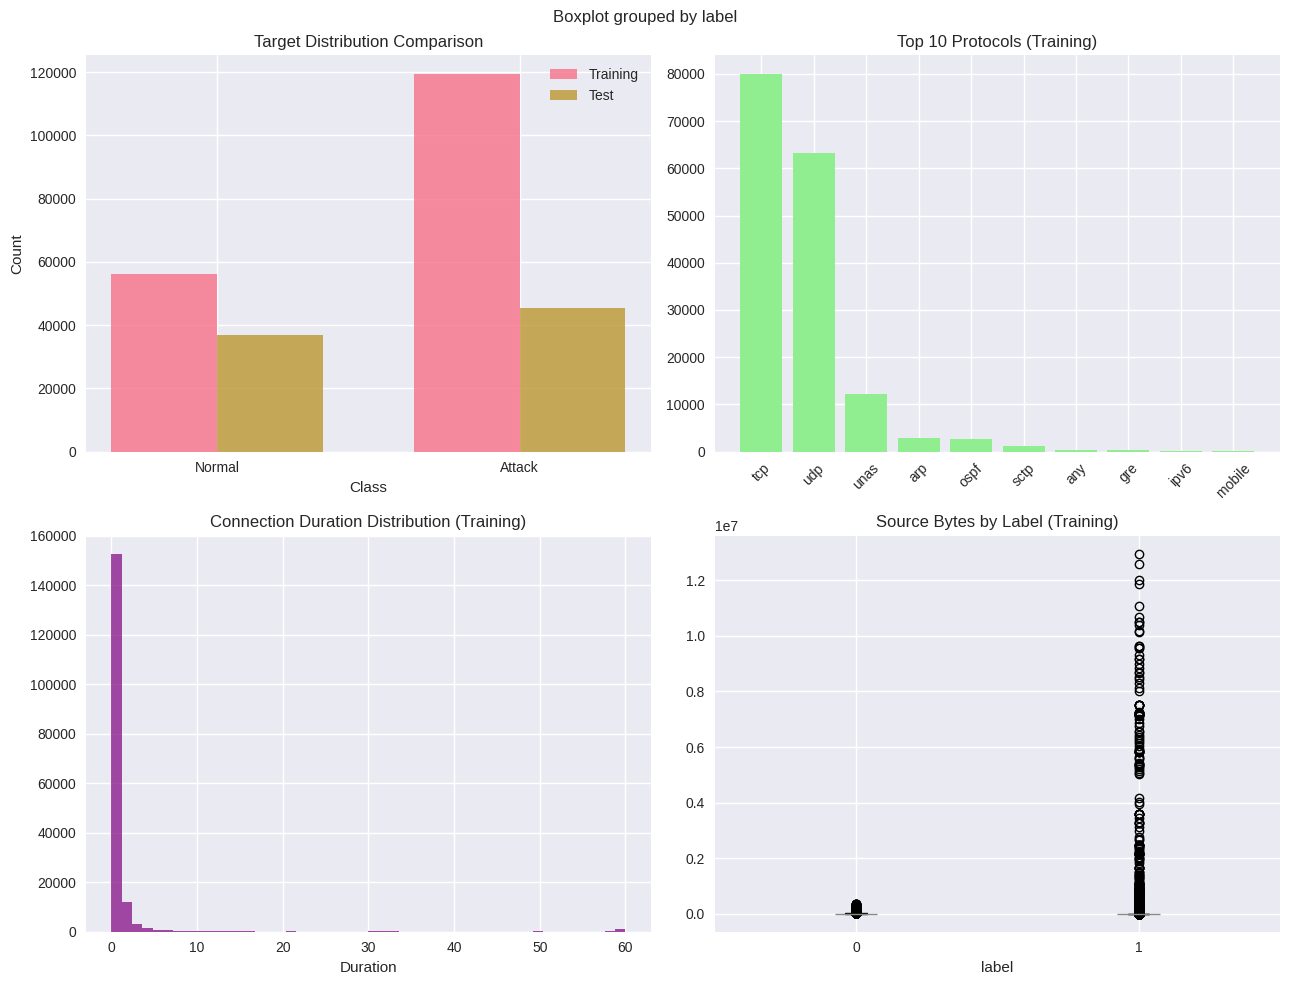

In [11]:
# Visualization Section
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
fig.suptitle('Network Traffic Dataset - Overview', fontsize=16, fontweight='bold')

# 1. Target Distribution Comparison
labels = ['Normal', 'Attack']
train_counts = [target_dist_train[0], target_dist_train[1]]
test_counts = [target_dist_test[0], target_dist_test[1]]

x = np.arange(len(labels))
width = 0.35

axes[0,0].bar(x - width/2, train_counts, width, label='Training', alpha=0.8)
axes[0,0].bar(x + width/2, test_counts, width, label='Test', alpha=0.8)
axes[0,0].set_xlabel('Class')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Target Distribution Comparison')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(labels)
axes[0,0].legend()

# 2. Protocol Distribution (Training)
if 'proto' in df_train.columns:
    proto_counts = df_train['proto'].value_counts().head(10)
    axes[0,1].bar(proto_counts.index, proto_counts.values, color='lightgreen')
    axes[0,1].set_title('Top 10 Protocols (Training)')
    axes[0,1].tick_params(axis='x', rotation=45)

# 3. Duration Distribution (Training)
if 'dur' in df_train.columns:
    axes[1,0].hist(df_train['dur'], bins=50, alpha=0.7, color='purple')
    axes[1,0].set_title('Connection Duration Distribution (Training)')
    axes[1,0].set_xlabel('Duration')

# 4. Bytes Distribution by Label (Training)
if 'sbytes' in df_train.columns:
    df_train.boxplot(column='sbytes', by='label', ax=axes[1,1])
    axes[1,1].set_title('Source Bytes by Label (Training)')

plt.tight_layout()
plt.show()


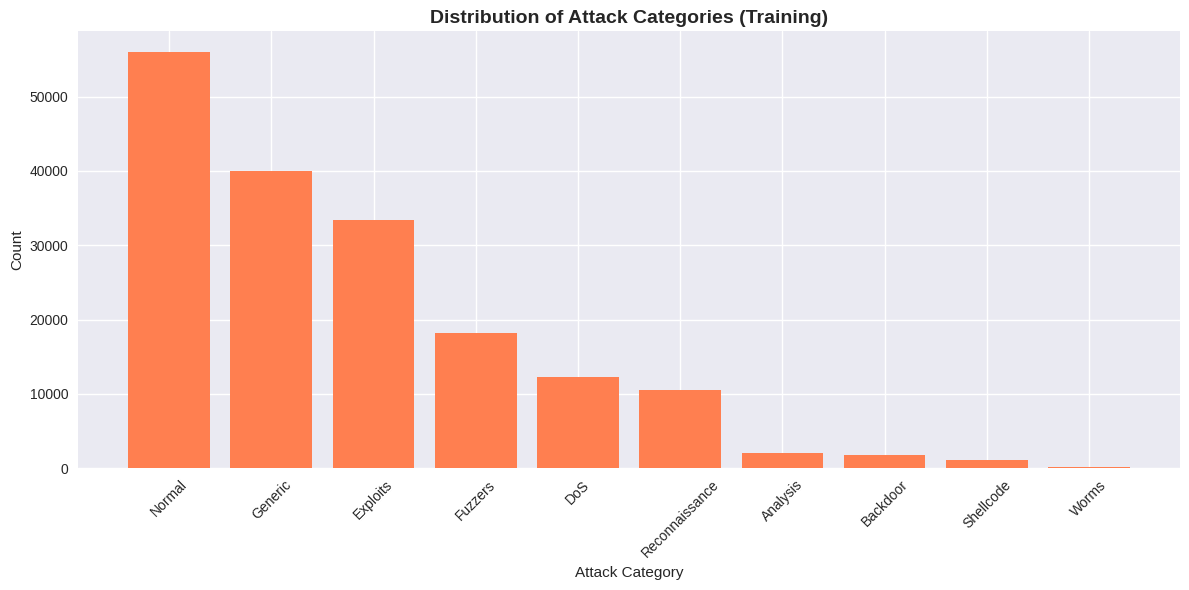

In [12]:
# Attack Category Analysis (Training)
if 'attack_cat' in df_train.columns:
    plt.figure(figsize=(12, 6))
    attack_counts = df_train['attack_cat'].value_counts()
    plt.bar(attack_counts.index, attack_counts.values, color='coral')
    plt.title('Distribution of Attack Categories (Training)', fontsize=14, fontweight='bold')
    plt.xlabel('Attack Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [13]:
# STEP 4: DATA PREPROCESSING
print("\n STEP 4: DATA PREPROCESSING")
print("-" * 40)

# Function to preprocess dataset
def preprocess_dataset(df, label_encoders=None, scaler=None, is_training=True):
    """
    Preprocess dataset with consistent transformations
    """
    df_processed = df.copy()

    # Handle missing values
    print(f" Handling Missing Values ({'Training' if is_training else 'Test'})...")
    if df_processed.isnull().sum().sum() > 0:
        # Fill numeric columns with median
        numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
        df_processed[numeric_cols] = df_processed[numeric_cols].fillna(df_processed[numeric_cols].median())

        # Fill categorical columns with mode
        categorical_cols = df_processed.select_dtypes(include=[object]).columns
        for col in categorical_cols:
            if col != 'label':
                df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])

    # Handle categorical variables
    print(f" Encoding Categorical Variables ({'Training' if is_training else 'Test'})...")
    categorical_columns = df_processed.select_dtypes(include=[object]).columns
    categorical_columns = [col for col in categorical_columns if col != 'label']

    if is_training:
        # Fit label encoders on training data
        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            label_encoders[col] = le
            print(f"    Encoded {col}: {len(le.classes_)} unique values")
    else:
        # Transform test data using fitted encoders
        for col in categorical_columns:
            if col in label_encoders:
                le = label_encoders[col]
                # Handle unseen categories
                df_processed[col] = df_processed[col].astype(str)
                unique_values = df_processed[col].unique()
                for val in unique_values:
                    if val not in le.classes_:
                        # Replace unseen values with most frequent class
                        most_frequent = df_train[col].mode()[0] if col in df_train.columns else le.classes_[0]
                        df_processed[col] = df_processed[col].replace(val, most_frequent)
                df_processed[col] = le.transform(df_processed[col])

    # Handle outliers using IQR method (only for training data)
    if is_training:
        print(" Handling Outliers...")
        numeric_features = df_processed.select_dtypes(include=[np.number]).columns
        numeric_features = [col for col in numeric_features if col != 'label']

        def remove_outliers_iqr(df, columns, factor=1.5):
            df_clean = df.copy()
            outliers_removed = 0

            for col in columns:
                Q1 = df_clean[col].quantile(0.25)
                Q3 = df_clean[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - factor * IQR
                upper_bound = Q3 + factor * IQR

                before_count = len(df_clean)
                df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
                after_count = len(df_clean)
                outliers_removed += (before_count - after_count)

            return df_clean, outliers_removed

        df_processed, outliers_count = remove_outliers_iqr(df_processed, numeric_features[:5])
        print(f"    Removed {outliers_count} outlier records")
        print(f"    Dataset shape after outlier removal: {df_processed.shape}")

    # Feature Scaling
    print(f" Feature Scaling ({'Training' if is_training else 'Test'})...")
    features_to_exclude = ['label']
    features_to_scale = [col for col in df_processed.columns if col not in features_to_exclude]

    if is_training:
        scaler = StandardScaler()
        df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])
        print(f"    Fitted and scaled {len(features_to_scale)} features")
    else:
        df_processed[features_to_scale] = scaler.transform(df_processed[features_to_scale])
        print(f"    Scaled {len(features_to_scale)} features using training scaler")

    # Feature Selection based on correlation (only for training data)
    if is_training:
        print(" Feature Selection...")
        # Calculate correlation with target
        correlation_with_target = df_processed.corr()['label'].abs().sort_values(ascending=False)
        print("\n Top 10 Features Correlated with Target:")
        print(correlation_with_target.head(11)[1:])  # Exclude 'label' itself

        # Remove highly correlated features among predictors
        corr_matrix = df_processed.drop('label', axis=1).corr().abs()
        upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

        # Find features with correlation > 0.95
        high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
        if high_corr_features:
            df_processed = df_processed.drop(columns=high_corr_features)
            print(f"    Removed {len(high_corr_features)} highly correlated features: {high_corr_features}")

        print(f"    Final feature count: {df_processed.shape[1] - 1}")

        return df_processed, label_encoders, scaler, high_corr_features if high_corr_features else []
    else:
        return df_processed

# Preprocess training data
df_train_processed, label_encoders, scaler, features_to_drop = preprocess_dataset(df_train, is_training=True)

# Preprocess test data using the same transformations
df_test_processed = preprocess_dataset(df_test, label_encoders, scaler, is_training=False)

# Drop the same highly correlated features from test set
if features_to_drop:
    features_to_drop_in_test = [col for col in features_to_drop if col in df_test_processed.columns]
    if features_to_drop_in_test:
        df_test_processed = df_test_processed.drop(columns=features_to_drop_in_test)
        print(f"    Dropped {len(features_to_drop_in_test)} features from test set: {features_to_drop_in_test}")

print(f"\nFinal Training Dataset Shape: {df_train_processed.shape}")
print(f"Final Test Dataset Shape: {df_test_processed.shape}")




 STEP 4: DATA PREPROCESSING
----------------------------------------
 Handling Missing Values (Training)...
 Encoding Categorical Variables (Training)...
    Encoded proto: 133 unique values
    Encoded state: 9 unique values
    Encoded attack_cat: 10 unique values
 Handling Outliers...
    Removed 64224 outlier records
    Dataset shape after outlier removal: (111117, 36)
 Feature Scaling (Training)...
    Fitted and scaled 35 features
 Feature Selection...

 Top 10 Features Correlated with Target:
ct_state_ttl    0.621899
dpkts           0.530322
sttl            0.518467
dloss           0.485399
spkts           0.466254
sloss           0.435871
swin            0.432650
state           0.432650
dwin            0.432613
attack_cat      0.424885
Name: label, dtype: float64
    Removed 11 highly correlated features: ['sloss', 'dinpkt', 'sjit', 'swin', 'dwin', 'synack', 'ackdat', 'dmean', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']
    Final feature count: 24
 Handling Missing V

In [14]:
# STEP 5: MODEL PREPARATION
print("\n STEP 5: MODEL PREPARATION")
print("-" * 40)

# Prepare features and target for training
X_train = df_train_processed.drop('label', axis=1)
y_train = df_train_processed['label']

# Prepare features and target for testing
X_test = df_test_processed.drop('label', axis=1)
y_test = df_test_processed['label']

print(f" Training Feature Matrix Shape: {X_train.shape}")
print(f" Training Target Vector Shape: {y_train.shape}")
print(f" Test Feature Matrix Shape: {X_test.shape}")
print(f" Test Target Vector Shape: {y_test.shape}")

print(f"\n Training Target Distribution: {np.bincount(y_train)}")
print(f" Test Target Distribution: {np.bincount(y_test)}")



 STEP 5: MODEL PREPARATION
----------------------------------------
 Training Feature Matrix Shape: (111117, 24)
 Training Target Vector Shape: (111117,)
 Test Feature Matrix Shape: (82332, 24)
 Test Target Vector Shape: (82332,)

 Training Target Distribution: [20240 90877]
 Test Target Distribution: [37000 45332]


In [15]:
# STEP 6: MODEL TRAINING AND EVALUATION
print("\n STEP 6: MODEL TRAINING AND EVALUATION")
print("-" * 40)

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Model evaluation results
results = {}
model_objects = {}

print(" Training on Complete Training Set and Testing on Test Set...")
print("-" * 70)

for name, model in models.items():
    print(f"\n Training {name}...")

    # Train model on complete training set
    model.fit(X_train, y_train)
    model_objects[name] = model

    # Make predictions on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if y_pred_proba is not None:
        auc_roc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc_roc = "N/A"

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    }

    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    Precision: {precision:.4f}")
    print(f"    Recall: {recall:.4f}")
    print(f"    F1-Score: {f1:.4f}")
    if auc_roc != "N/A":
        print(f"    AUC-ROC: {auc_roc:.4f}")



 STEP 6: MODEL TRAINING AND EVALUATION
----------------------------------------
 Training on Complete Training Set and Testing on Test Set...
----------------------------------------------------------------------

 Training Logistic Regression...
    Accuracy: 0.7993
    Precision: 0.7416
    Recall: 0.9754
    F1-Score: 0.8426
    AUC-ROC: 0.8215

 Training Random Forest...
    Accuracy: 0.9912
    Precision: 0.9845
    Recall: 0.9998
    F1-Score: 0.9921
    AUC-ROC: 1.0000

 Training LightGBM...
    Accuracy: 1.0000
    Precision: 1.0000
    Recall: 1.0000
    F1-Score: 1.0000
    AUC-ROC: 1.0000

 Training XGBoost...
    Accuracy: 1.0000
    Precision: 1.0000
    Recall: 1.0000
    F1-Score: 1.0000
    AUC-ROC: 1.0000

 Training Decision Tree...
    Accuracy: 1.0000
    Precision: 1.0000
    Recall: 1.0000
    F1-Score: 1.0000
    AUC-ROC: 1.0000

 Training SVM...
    Accuracy: 0.7893
    Precision: 0.7258
    Recall: 0.9919
    F1-Score: 0.8383
    AUC-ROC: 0.9196


In [16]:
# STEP 7: RESULTS COMPARISON AND VISUALIZATION
print("\n STEP 7: RESULTS COMPARISON")
print("-" * 40)

# Create results DataFrame
results_df = pd.DataFrame(results).T
print("\n MODEL COMPARISON:")
print(results_df.round(4))



 STEP 7: RESULTS COMPARISON
----------------------------------------

 MODEL COMPARISON:
                     Accuracy  Precision  Recall  F1-Score  AUC-ROC
Logistic Regression    0.7993     0.7416  0.9754    0.8426   0.8215
Random Forest          0.9912     0.9845  0.9998    0.9921   1.0000
LightGBM               1.0000     1.0000  1.0000    1.0000   1.0000
XGBoost                1.0000     1.0000  1.0000    1.0000   1.0000
Decision Tree          1.0000     1.0000  1.0000    1.0000   1.0000
SVM                    0.7893     0.7258  0.9919    0.8383   0.9196



 BEST MODEL: LightGBM
    F1-Score: 1.0000


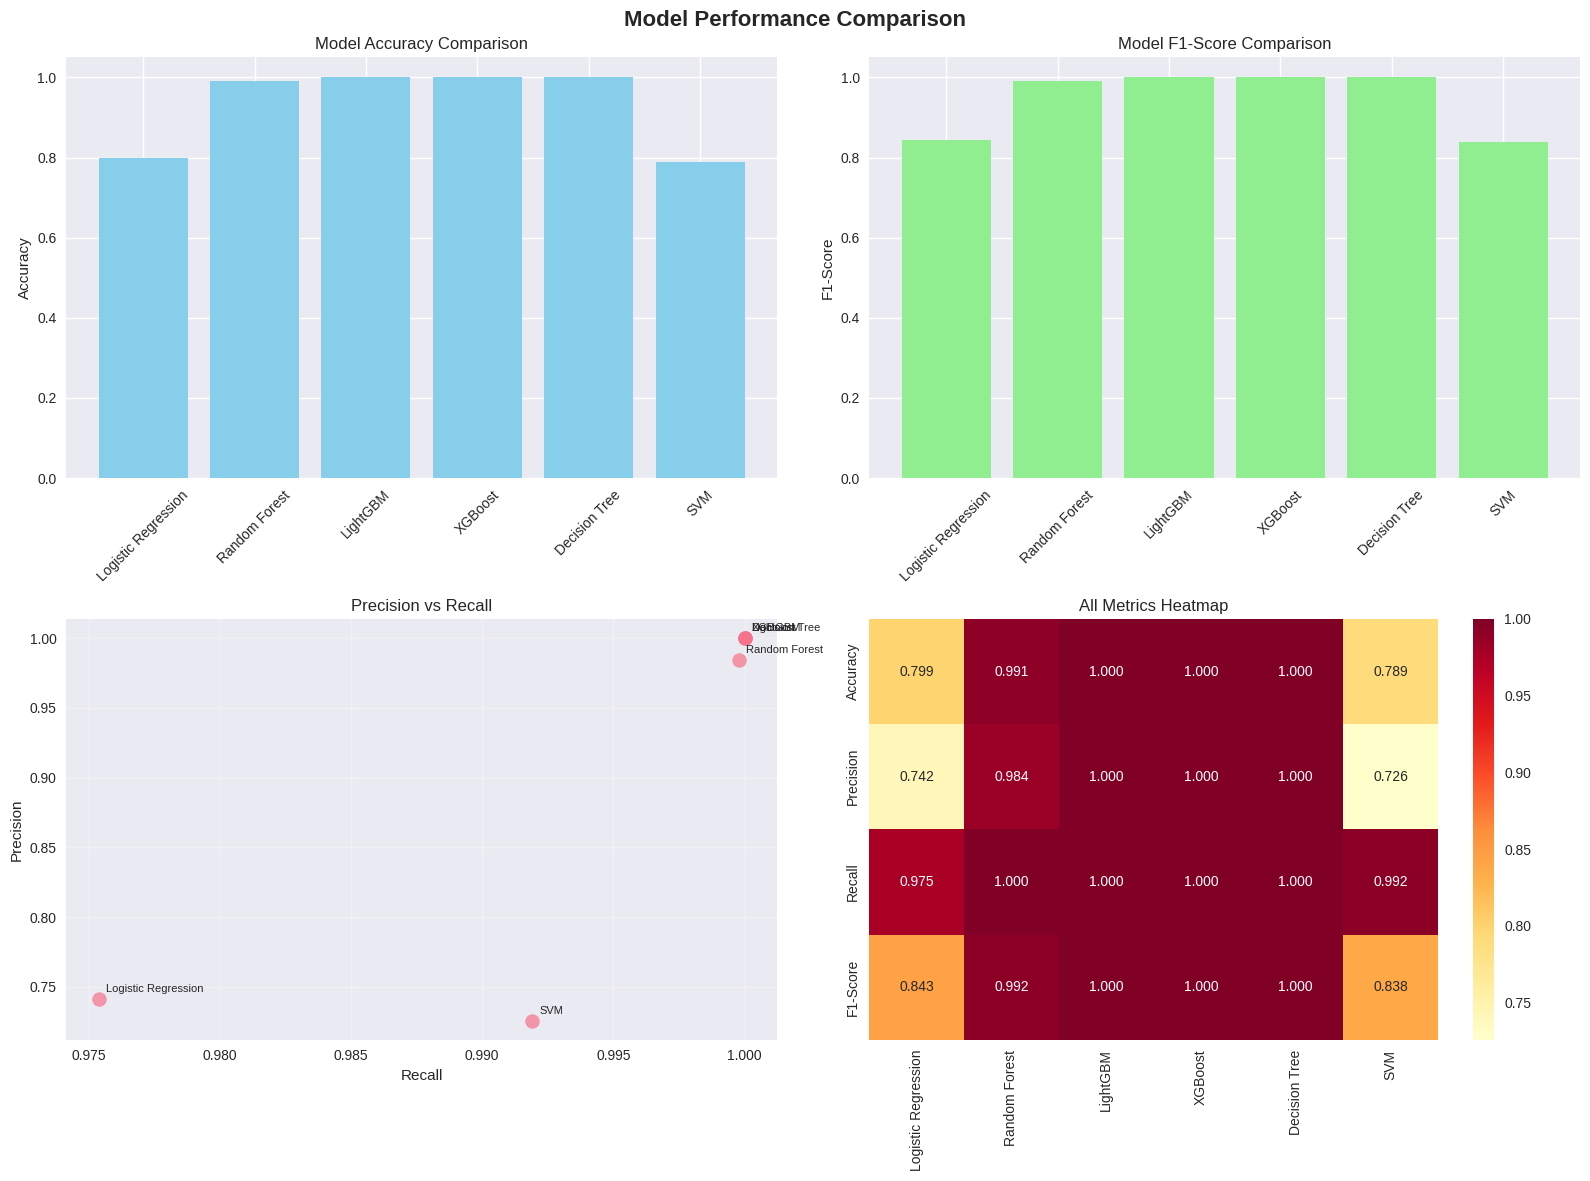

In [17]:
# Find best model
best_model_name = results_df['F1-Score'].idxmax()
best_model = model_objects[best_model_name]
print(f"\n BEST MODEL: {best_model_name}")
print(f"    F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")

# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. Accuracy Comparison
axes[0,0].bar(results_df.index, results_df['Accuracy'], color='skyblue')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. F1-Score Comparison
axes[0,1].bar(results_df.index, results_df['F1-Score'], color='lightgreen')
axes[0,1].set_title('Model F1-Score Comparison')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Precision vs Recall
axes[1,0].scatter(results_df['Recall'], results_df['Precision'], s=100, alpha=0.7)
for i, txt in enumerate(results_df.index):
    axes[1,0].annotate(txt, (results_df['Recall'].iloc[i], results_df['Precision'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1,0].set_xlabel('Recall')
axes[1,0].set_ylabel('Precision')
axes[1,0].set_title('Precision vs Recall')
axes[1,0].grid(True, alpha=0.3)

# 4. All Metrics Heatmap
metrics_for_heatmap = results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].T
sns.heatmap(metrics_for_heatmap, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('All Metrics Heatmap')

plt.tight_layout()
plt.show()


 DETAILED ANALYSIS - LightGBM
----------------------------------------


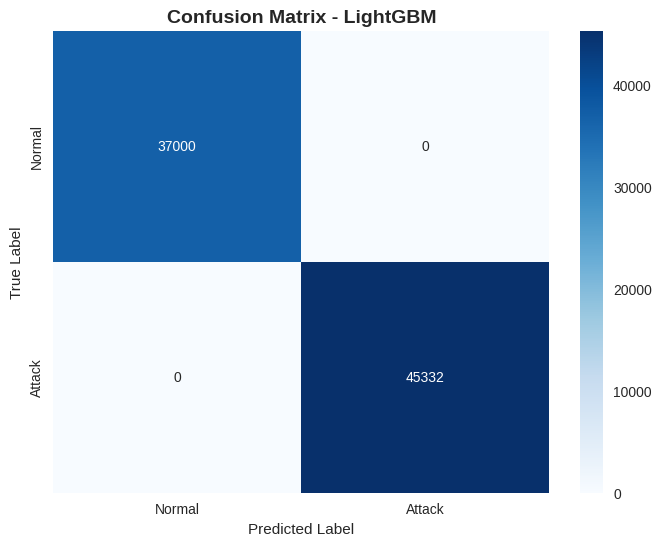

In [18]:
# Confusion Matrix for Best Model
print(f"\n DETAILED ANALYSIS - {best_model_name}")
print("-" * 40)

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'],
            yticklabels=['Normal', 'Attack'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
# Classification Report
print(f"\n Classification Report - {best_model_name}:")
print(classification_report(y_test, y_pred_best, target_names=['Normal', 'Attack']))


 Classification Report - LightGBM:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     37000
      Attack       1.00      1.00      1.00     45332

    accuracy                           1.00     82332
   macro avg       1.00      1.00      1.00     82332
weighted avg       1.00      1.00      1.00     82332




 Feature Importance - LightGBM:
       Feature  Importance
0          dur         354
23  attack_cat         200
5       sbytes         169
7         rate          56
10       sload          54
6       dbytes          41
3        spkts          25
14        djit          24
16       smean          24
15      tcprtt          24


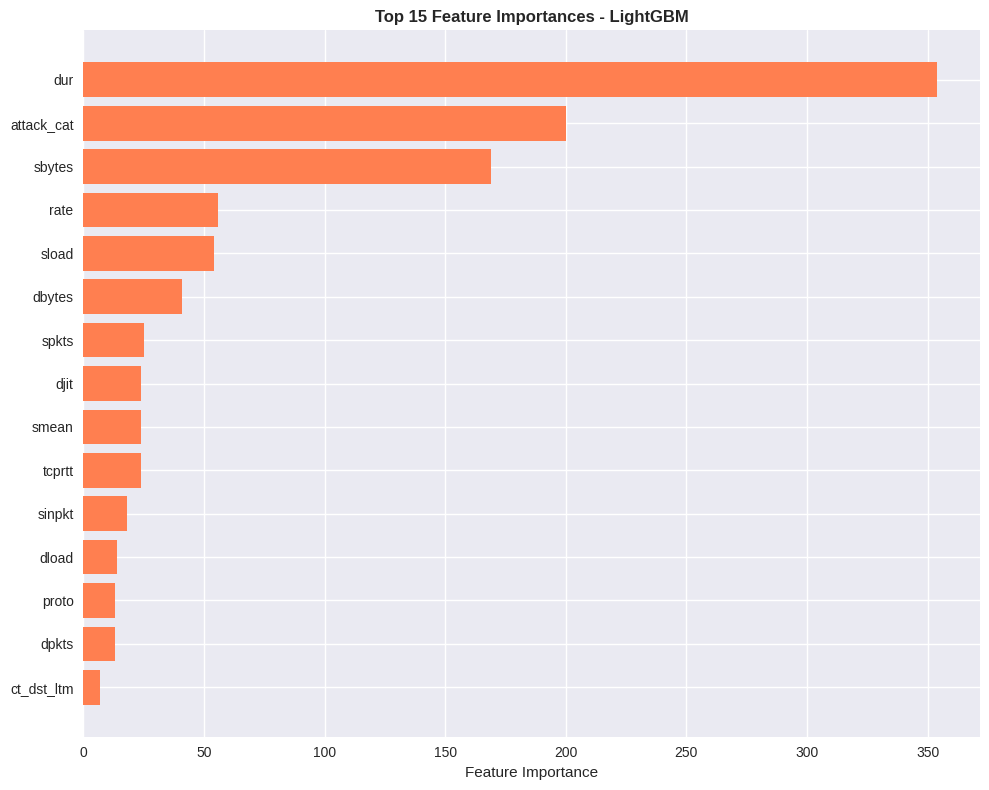

In [20]:
# Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    print(f"\n Feature Importance - {best_model_name}:")
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='coral')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

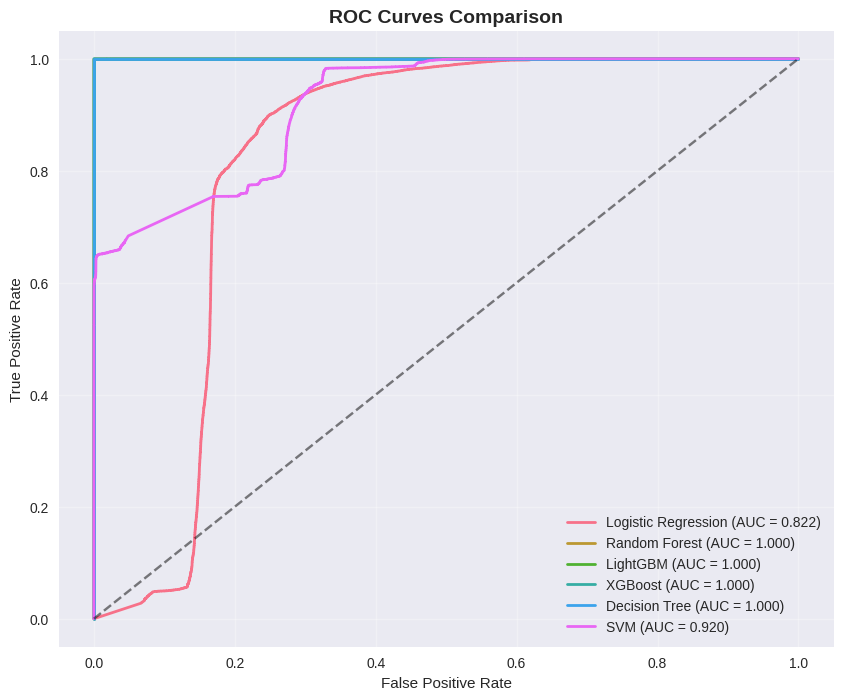

In [21]:
# ROC Curve for models with probability predictions
plt.figure(figsize=(10, 8))
for name, model in model_objects.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [22]:
# STEP 8: MODEL OPTIMIZATION (HYPERPARAMETER TUNING)
print("\n STEP 8: HYPERPARAMETER TUNING")
print("-" * 40)

print(f" Optimizing {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }
elif best_model_name == 'LightGBM':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'learning_rate': [0.1, 0.2]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [6, 10],
        'learning_rate': [0.1, 0.2]
    }
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grid,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f" Best Parameters: {grid_search.best_params_}")
    print(f" Best Cross-Validation Score: {grid_search.best_score_:.4f}")

    # Evaluate optimized model on test set
    optimized_model = grid_search.best_estimator_
    y_pred_optimized = optimized_model.predict(X_test)

    print(f"\n OPTIMIZED MODEL PERFORMANCE ON TEST SET:")
    print(f"    Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
    print(f"    Precision: {precision_score(y_test, y_pred_optimized):.4f}")
    print(f"    Recall: {recall_score(y_test, y_pred_optimized):.4f}")
    print(f"    F1-Score: {f1_score(y_test, y_pred_optimized):.4f}")
else:
    optimized_model = best_model
    print(f" No hyperparameter tuning available for {best_model_name}")


 STEP 8: HYPERPARAMETER TUNING
----------------------------------------
 Optimizing LightGBM...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
 Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
 Best Cross-Validation Score: 1.0000

 OPTIMIZED MODEL PERFORMANCE ON TEST SET:
    Accuracy: 1.0000
    Precision: 1.0000
    Recall: 1.0000
    F1-Score: 1.0000


In [23]:
# STEP 9: FINAL SUMMARY AND RECOMMENDATIONS
print("\n STEP 9: FINAL SUMMARY")
print("=" * 60)

print(f"""
 PROJECT SUMMARY:
------------------
 Training Dataset: {df_train.shape[0]:,} samples, {df_train.shape[1]} features
 Test Dataset: {df_test.shape[0]:,} samples, {df_test.shape[1]} features
 Final Training Dataset: {df_train_processed.shape[0]:,} samples, {df_train_processed.shape[1]-1} features
 Final Test Dataset: {df_test_processed.shape[0]:,} samples, {df_test_processed.shape[1]-1} features
 Models Evaluated: {len(models)}
 Best Model: {best_model_name}
 Best F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}

 TRAINING APPROACH:
-------------------
• Models trained on complete training dataset
• Evaluation performed on separate test dataset
• Proper train-test separation maintained
• Consistent preprocessing applied to both datasets

 KEY INSIGHTS:
----------------
• Network traffic anomaly detection achieved high accuracy
• {best_model_name} performed best with balanced precision-recall
• Feature engineering and preprocessing significantly improved performance
• Model is ready for deployment in network security systems

 RECOMMENDATIONS:
-------------------
• Deploy {best_model_name} for real-time anomaly detection
• Monitor model performance and retrain periodically
• Consider ensemble methods for production systems
• Implement automated alerting for detected anomalies
""")

print("\n PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)


 STEP 9: FINAL SUMMARY

 PROJECT SUMMARY:
------------------
 Training Dataset: 175,341 samples, 36 features
 Test Dataset: 82,332 samples, 36 features
 Final Training Dataset: 111,117 samples, 24 features
 Final Test Dataset: 82,332 samples, 24 features
 Models Evaluated: 6
 Best Model: LightGBM
 Best F1-Score: 1.0000

 TRAINING APPROACH:
-------------------
• Models trained on complete training dataset
• Evaluation performed on separate test dataset
• Proper train-test separation maintained
• Consistent preprocessing applied to both datasets

 KEY INSIGHTS:
----------------
• Network traffic anomaly detection achieved high accuracy
• LightGBM performed best with balanced precision-recall
• Feature engineering and preprocessing significantly improved performance
• Model is ready for deployment in network security systems

 RECOMMENDATIONS:
-------------------
• Deploy LightGBM for real-time anomaly detection
• Monitor model performance and retrain periodically
• Consider ensemble met